#  <span style="text-decoration:underline;">Assignment 2</span>: Clustering Yelp Data

## Introduction 

In this assignment, we will be working with the [Yelp data set](http://cs-people.bu.edu/bahargam/506/yelp_dataset_challenge_academic_dataset.tar). You can find information about the format of the data set [here](https://www.yelp.com/dataset_challenge).

## Submission 

Please use the following invitation link to create your assignment repository for this assignment: [https://classroom.github.com/a/nowbCi7s](https://classroom.github.com/a/nowbCi7s). Include your BU username within your submission by adding it here: **<Yangicnt U15264011&gt;**.

Do not delete the output of your code cells. This assignment must be completed **individually** by each student.

## <span style="text-decoration:underline;">Problem 1</span>: Clustering, Scaling, and Visualizing

**<span style="text-decoration:underline;">Part A</span> (35 points):** From the Business Objects data set (`yelp_academic_dataset_business.json`), we want to find culinary districts in Las Vegas. These districts are characterized by the physical proximity and similarity of restaurants. We can use `longitude` and `latitude` to cluster for proximity, and `categories` to cluster for similarity. Only a subset (the top 15) of the most popular categories should be used.

Note that the spatial coordinates and restaurant categories have different units of scale. Your results could be arbitrarily skewed if you don't incorporate some scaling.

Find clusters using $k$-means++ (you are permitted to use the implementation available in scikit-learn). Explain your data representation and how you determined the number of clusters in $k$-means++.

In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import sklearn
import json
import pandas as pd
from pandas import DataFrame, Series
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [2]:
yelp_list = list()

In [3]:
with open('yelp_academic_dataset_business.json') as json_data:
    # print(type(json_data))
    # multiple json in a file cause fail in reading\n",
    # read by line, dump to dict, convert dict to df\n",
    # only get the data we need, cut part for experiment.\n",
    i = 0
    for line in json_data:
        #if i >= 10000:
            #break
        #i += 1
        #single_row = list()
        single_row = json.loads(line)
        if single_row.get("city") == "Las Vegas" and not len(single_row.get("categories")) == 0 and single_row.get("categories")[-1] == "Restaurants":
            yelp_list.append(single_row)
        
        #df = df.append(, ignore_index = True)
print(len(yelp_list))

4395


In [4]:
all_data = pd.DataFrame.from_dict(yelp_list, orient='columns')[["business_id","longitude","latitude","categories"]]
all_data

,business_id,longitude,latitude,categories
0,l6QcUE8XXLrVH6Ydm4GSNw,-115.191385,36.197409,"[Burgers, American (Traditional), Fast Food, R..."
1,AgtFQVxo-PGQVsOdY6Nvdg,-115.107474,35.999205,"[Pizza, Restaurants]"
2,muqFM9Hoamh_fGL4MPeZqg,-115.117891,36.017605,"[Pubs, Bars, Nightlife, Irish, Restaurants]"
3,AFDFOs2GaIyUArGyEUDQzQ,-115.197904,36.125908,"[Chinese, Restaurants]"
4,FV16IeXJp2W6pnghTz2FAw,-115.193971,36.126177,"[Vietnamese, Chinese, Restaurants]"
5,cvJDHk1ho0DxaF26etcr8Q,-115.207747,36.142935,"[Latin American, Colombian, Restaurants]"
6,10UcN8MF1kQiyTJAfHKvfQ,-115.187588,36.145596,"[Delis, Italian, Sandwiches, Restaurants]"
7,R5e2XWtpa_CA77MIXEyCTg,-115.206002,36.130335,"[Fast Food, Sandwiches, Restaurants]"
8,CoJivG0wxNIBXyOF7MNqSQ,-115.195980,36.125381,"[Vietnamese, Restaurants]"
9,pCobXgTy6DIfBaT4pjlq0w,-115.206316,36.143326,"[Sandwiches, Restaurants]"


In [5]:
cat = all_data[["business_id","categories"]]

In [6]:
cat = cat.set_index("business_id")
cate_freq = dict();
for bus_id,data in cat.iterrows():
    type_list = data.iloc[-1]
    list_data = type_list[:-1]
    for food_type in list_data:
        old_count = cate_freq.get(food_type, 0)
        new_count = old_count + 1
        cate_freq[food_type] = new_count
            
cate_freq

{'Burgers': 347,
 'American (Traditional)': 459,
 'Fast Food': 657,
 'Pizza': 416,
 'Pubs': 68,
 'Bars': 346,
 'Nightlife': 362,
 'Irish': 8,
 'Chinese': 343,
 'Vietnamese': 65,
 'Latin American': 41,
 'Colombian': 3,
 'Delis': 97,
 'Italian': 96,
 'Sandwiches': 429,
 'Food': 318,
 'Specialty Food': 28,
 'Juice Bars & Smoothies': 45,
 'Fruits & Veggies': 1,
 'Mexican': 569,
 'Seafood': 167,
 'Korean': 80,
 'Barbeque': 131,
 'American (New)': 311,
 'Sports Bars': 78,
 'Vegetarian': 41,
 'Indian': 38,
 'Vegan': 32,
 'Hawaiian': 78,
 'Chicken Wings': 125,
 'Karaoke': 12,
 'Cheesesteaks': 14,
 'Buffets': 98,
 'Filipino': 43,
 'Pakistani': 9,
 'Sushi Bars': 178,
 'Japanese': 249,
 'Coffee & Tea': 50,
 'Breakfast & Brunch': 202,
 'Steakhouses': 159,
 'Music Venues': 13,
 'Arts & Entertainment': 47,
 'Dive Bars': 3,
 'Kosher': 13,
 'Persian/Iranian': 13,
 'Middle Eastern': 30,
 'Tex-Mex': 47,
 'Asian Fusion': 124,
 'Thai': 123,
 'Lounges': 43,
 'Diners': 44,
 'Wine Bars': 21,
 'Taiwanese': 15

In [7]:
top_cate = pd.DataFrame.from_dict(cate_freq, orient='index', columns=['num'])
top_cate = top_cate.sort_values(["num"],ascending=False)
top_cate = top_cate[0:15]
top_cate

,num
Fast Food,657
Mexican,569
American (Traditional),459
Sandwiches,429
Pizza,416
Nightlife,362
Burgers,347
Bars,346
Chinese,343
Food,318


In [8]:
top_cate['categories'] = top_cate.index
top_cate_list = top_cate["categories"].tolist()
top_cate_list

['Fast Food',
 'Mexican',
 'American (Traditional)',
 'Sandwiches',
 'Pizza',
 'Nightlife',
 'Burgers',
 'Bars',
 'Chinese',
 'Food',
 'American (New)',
 'Japanese',
 'Breakfast & Brunch',
 'Sushi Bars',
 'Seafood']

In [9]:
# notice that our all_data DataFrame composite of only resturants in Las Vegas
# now we need decide to use resturant that in the top 15 categories or all restaurants.
# Cluster the restaurants using the text of the restaurant reviews (rather than the categories) 
# decide to use all restaurants
# if need switch, just change this assignment statement
all_restaurants = all_data

In [10]:
all_restaurants.shape

(4395, 4)

In [11]:
id_in_all_res = all_restaurants.business_id.values.tolist()
len(id_in_all_res)

4395

In [12]:
# create a 2d matrix that takes only non zero score of categories and another matrix takes correspond long and lat
# so we can use it afterward, in feature scalaing
# this one uses all data we have
# but for test case, we normally just use partial data, which is the "yelp" data set with 10000 rows
res_in_top_cat = []
location_res_in_top_cat = []
all_id_top_cat_res = []
for bus_id,data in all_restaurants.iterrows():
    types = data["categories"][:-1]
    #print(bus_id)
    tmp = list()
    isin = 0 # reset isin each time
    for c in top_cate_list:
        if c in types:
            isin = 1
            tmp.append(1)
        else:
            tmp.append(0)
    
    if isin: # if the restaurants is in the top categories, we could then add it actegoreis score and locaiton to two lists
        res_in_top_cat.append(tmp)
        #rowIndex = Restaurants.index[i]
        # output as [[long, lat]] 
        location = all_restaurants.iloc[bus_id][["longitude", "latitude"]].values.tolist()
        single_id = all_restaurants.iloc[bus_id][["business_id"]].values.tolist()
        #print(location)
        all_id_top_cat_res += single_id
        location_res_in_top_cat += [location]
        
print(len(location_res_in_top_cat))
print(len(res_in_top_cat))
len(all_id_top_cat_res)

3487
3487


3487

In [13]:
location_res_in_top_cat[0]

[-115.1913849, 36.1974092]

In [14]:
res_in_top_cat[0]

[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [15]:
from sklearn import preprocessing
import numpy as np
# I tried to use scale method from class, but that just scale inside an array
# we want to keep the range of two arrays within certain values
# from sklearn lib, use MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (1, 15), copy = True) # keep original intact
scaled_location_res_in_top_cat = min_max_scaler.fit_transform(np.array(location_res_in_top_cat)).tolist()
print(len(scaled_location_res_in_top_cat))
scaled_location_res_in_top_cat

3487


[[7.215506492615532, 9.903747116304885],
 [10.464714069344154, 2.0337109435490675],
 [10.061336603704149, 2.764325165676155],
 [6.963072245769581, 7.064674187105766],
 [7.115366871230435, 7.075355275226457],
 [7.362531019291055, 7.846422629612334],
 [6.649499431889126, 7.240455514657697],
 [6.637340644095275, 7.756276628270371],
 [6.999405336811833, 7.045742057677899],
 [7.168722265185352, 7.8303414374599924],
 [7.189055320824991, 7.30074211723786],
 [7.82576534535292, 7.822634377220993],
 [7.249636287398971, 7.873673301647386],
 [6.703289986226082, 7.820963560383916],
 [6.587795519945757, 8.012900689704566],
 [6.608933998471002, 7.092687226768476],
 [7.1007840703287, 7.786278970962485],
 [6.843188147007822, 7.814812167704758],
 [7.491052062004201, 7.782029050669507],
 [7.961955385325382, 8.382243981464853],
 [6.519857325089106, 7.7421529738292065],
 [6.548372393023783, 8.067429828427521],
 [6.999405336811833, 7.045742057677899],
 [6.552577629821826, 7.747866760374336],
 [6.58482939528

In [16]:
scaled_data = [] #scaled_location_res_in_top_cat[1] + res_in_top_cat[1]
for i in range(len(scaled_location_res_in_top_cat)):
    scaled_data += [scaled_location_res_in_top_cat[i] + res_in_top_cat[i]]
    #([scaled_location_res_in_top_cat[i][0] + sum(res_in_top_cat[i]),scaled_location_res_in_top_cat[i][1] + sum(res_in_top_cat[i])])
    
print(len(scaled_data[0]))
scaled_data[0]

17


[7.215506492615532,
 9.903747116304885,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

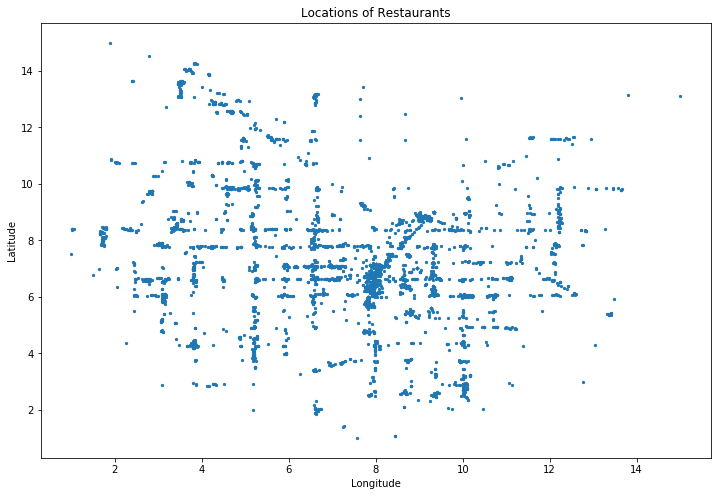

In [17]:
scaled_data = np.array(scaled_data)
plt.figure(figsize=(12,8))
_ = plt.scatter(scaled_data[:, 0], scaled_data[:, 1], s = 5)   #k[:,0]  every element[0] = longitude,etc
plt.title('Locations of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [18]:
# now we will try to find the best number of clustering for our data
# we will examine in three ways, by inertia, adjusted Rand Index and Silhouette Coefficient
# for intertia, we will examine cluster from 1 to 20
error = np.zeros(21)
for k in range(1, 21):
    kmeans = KMeans(init = "k-means++", n_clusters = k, n_init=10)
    kmeans.fit_predict(scaled_data)
    error[k] = kmeans.inertia_

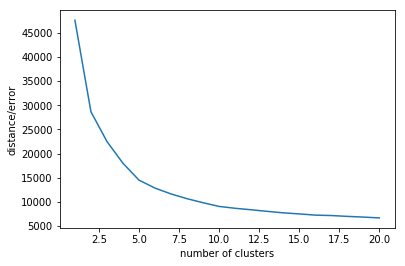

In [19]:
inertia_plot = plt.plot(range(1, len(error)), error[1:])
plt.xlabel("number of clusters")
plt.ylabel("distance/error")
inertia_plot

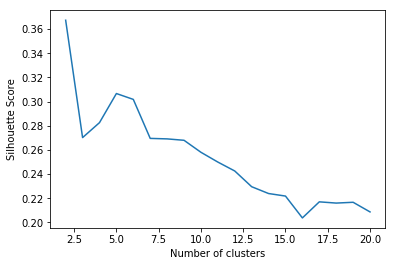

In [20]:
# to evaluate the sc for clusters assignment, we need at least have two clusters
# Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    
sc_evaluate_clusters(scaled_data,20)

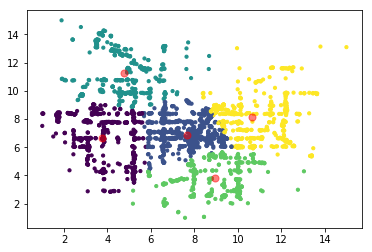

In [21]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=100)
y_kmeans = kmeans.fit_predict(scaled_data) # we already convert the scaled data in np array format
centers_cate = kmeans.cluster_centers_
#print(centers)
labels_cate = kmeans.labels_
error = kmeans.inertia_
#plt.figure(figsize=(12,10))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=y_kmeans, s=10, cmap='viridis')
plt.scatter(centers_cate[:, 0], centers_cate[:, 1], c='red', s=50, alpha=0.5);
plt.show()

**<span style="text-decoration:underline;">Part B</span> (15 points):** Visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot. Label each cluster with a category. In a markdown, explain how labels are assigned.

Note that some categories are inherently more common (e.g., "pizza"). When labeling your clusters, you want to avoid the scenario where all clusters are labeled as "pizza" simply because of the uniformly large number of these restaurants across all clusters. In other words, we don’t want to point out that pizza restaurants are pretty much evenly distributed in high quantities everywhere, but rather discover when they, or another type of restaurant, appear in notably high quantities.

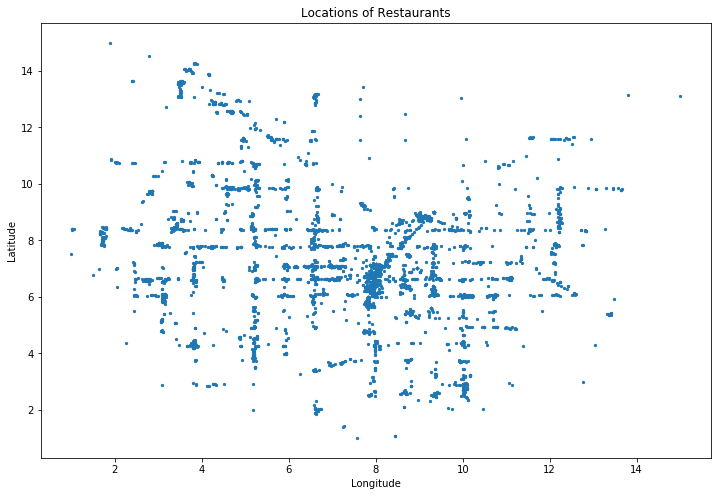

In [22]:
# this is the visualization merely with longitude and latitude in scatter plot
scaled_location_res_in_top_cat = np.array(scaled_location_res_in_top_cat)
plt.figure(figsize=(12,8))
_ = plt.scatter(scaled_location_res_in_top_cat[:, 0], scaled_location_res_in_top_cat[:, 1], s = 5)   #k[:,0]  every element[0] = longitude,etc
plt.title('Locations of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [23]:
# 2 location information plus 15 categories information
full_list = ["longitude", "latitude"] + top_cate_list
len(full_list)

17

In [24]:
clusters = pd.DataFrame(scaled_data, columns=full_list, copy=True)
clusters["cluster_label"] = labels_cate
clusters = clusters.sort_values("cluster_label", ascending = False)
clusters

,longitude,latitude,Fast Food,Mexican,American (Traditional),Sandwiches,Pizza,Nightlife,Burgers,Bars,Chinese,Food,American (New),Japanese,Breakfast & Brunch,Sushi Bars,Seafood,cluster_label
2597,10.779267,6.061708,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
475,11.210675,9.824195,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
477,11.505448,9.567761,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
478,10.828529,10.006464,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
479,12.327165,11.563410,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
480,12.086437,11.595592,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
481,10.821493,10.573884,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
482,10.929548,10.688104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
483,10.821133,10.617002,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
484,11.047705,10.673008,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [25]:
top_fift_freq_list = {'Fast Food': 657, 'Mexican': 569, 'American (Traditional)': 459, 'Sandwiches': 429, 'Pizza': 416, 'Nightlife': 362, 'Burgers': 347, 'Bars': 346, 'Chinese': 343, 'Food': 318, 'American (New)': 311, 'Japanese': 249, 'Breakfast & Brunch': 202, 'Sushi Bars': 178, 'Seafood': 167}
top_fift_freq_key_list = list(top_fift_freq_list.keys())
top_fift_freq_list

{'Fast Food': 657,
 'Mexican': 569,
 'American (Traditional)': 459,
 'Sandwiches': 429,
 'Pizza': 416,
 'Nightlife': 362,
 'Burgers': 347,
 'Bars': 346,
 'Chinese': 343,
 'Food': 318,
 'American (New)': 311,
 'Japanese': 249,
 'Breakfast & Brunch': 202,
 'Sushi Bars': 178,
 'Seafood': 167}

In [26]:
# try to turn the center nparray to a dataframe and then divided by the number of res in each cat to remove influence of very popular res type
center_df = pd.DataFrame(centers_cate, columns =full_list, copy=True)
center_df

,longitude,latitude,Fast Food,Mexican,American (Traditional),Sandwiches,Pizza,Nightlife,Burgers,Bars,Chinese,Food,American (New),Japanese,Breakfast & Brunch,Sushi Bars,Seafood
0,3.771472,6.659827,0.189552,0.153731,0.108955,0.129851,0.140299,0.089552,0.101493,0.085075,0.077612,0.098507,0.098507,0.091045,0.067164,0.082090,0.038806
1,7.669591,6.890817,0.144939,0.122699,0.143405,0.110429,0.085123,0.128067,0.093558,0.121933,0.136503,0.092791,0.103528,0.086656,0.059816,0.052147,0.066718
2,4.776500,11.238552,0.255914,0.174194,0.113978,0.139785,0.172043,0.086022,0.098925,0.081720,0.081720,0.088172,0.049462,0.043011,0.066667,0.040860,0.023656
3,8.927579,3.815219,0.200864,0.149028,0.159827,0.155508,0.129590,0.107991,0.105832,0.103672,0.062635,0.077754,0.088553,0.064795,0.047516,0.047516,0.036717
4,10.669072,8.123829,0.220513,0.266667,0.123077,0.104274,0.121368,0.076923,0.105983,0.075214,0.078632,0.092308,0.078632,0.042735,0.044444,0.023932,0.044444


In [27]:
for key, value in top_fift_freq_list.items():
    center_df[key] = center_df[key]/(value)
center_df

,longitude,latitude,Fast Food,Mexican,American (Traditional),Sandwiches,Pizza,Nightlife,Burgers,Bars,Chinese,Food,American (New),Japanese,Breakfast & Brunch,Sushi Bars,Seafood
0,3.771472,6.659827,0.000289,0.000270,0.000237,0.000303,0.000337,0.000247,0.000292,0.000246,0.000226,0.000310,0.000317,0.000366,0.000332,0.000461,0.000232
1,7.669591,6.890817,0.000221,0.000216,0.000312,0.000257,0.000205,0.000354,0.000270,0.000352,0.000398,0.000292,0.000333,0.000348,0.000296,0.000293,0.000400
2,4.776500,11.238552,0.000390,0.000306,0.000248,0.000326,0.000414,0.000238,0.000285,0.000236,0.000238,0.000277,0.000159,0.000173,0.000330,0.000230,0.000142
3,8.927579,3.815219,0.000306,0.000262,0.000348,0.000362,0.000312,0.000298,0.000305,0.000300,0.000183,0.000245,0.000285,0.000260,0.000235,0.000267,0.000220
4,10.669072,8.123829,0.000336,0.000469,0.000268,0.000243,0.000292,0.000212,0.000305,0.000217,0.000229,0.000290,0.000253,0.000172,0.000220,0.000134,0.000266


In [28]:
scaled_centers = center_df.values
scaled_centers

array([[3.77147216e+00, 6.65982739e+00, 2.88511779e-04, 2.70178108e-04,
        2.37375215e-04, 3.02682392e-04, 3.37256028e-04, 2.47381875e-04,
        2.92485698e-04, 2.45880424e-04, 2.26273878e-04, 3.09771895e-04,
        3.16744253e-04, 3.65641671e-04, 3.32495936e-04, 4.61177260e-04,
        2.32371079e-04],
       [7.66959068e+00, 6.89081748e+00, 2.20606774e-04, 2.15640398e-04,
        3.12428993e-04, 2.57411300e-04, 2.04621874e-04, 3.53777582e-04,
        2.69620410e-04, 3.52406114e-04, 3.97968127e-04, 2.91796890e-04,
        3.32886197e-04, 3.48017838e-04, 2.96118569e-04, 2.92962018e-04,
        3.99507733e-04],
       [4.77650040e+00, 1.12385516e+01, 3.89518993e-04, 3.06139804e-04,
        2.48319160e-04, 3.25839036e-04, 4.13564930e-04, 2.37628468e-04,
        2.85085681e-04, 2.36186214e-04, 2.38251983e-04, 2.77270576e-04,
        1.59042976e-04, 1.72733947e-04, 3.30033003e-04, 2.29551770e-04,
        1.41652180e-04],
       [8.92757943e+00, 3.81521877e+00, 3.05728966e-04, 2.619

In [29]:
cluster_name = list()
for i in range(len(scaled_centers)):
    print(np.argmax((scaled_centers[i][2:])))
    cluster_name.append(top_fift_freq_key_list[np.argmax((scaled_centers[i][3:]))])
    
cluster_name

13
14
4
3
1


['Breakfast & Brunch',
 'Sushi Bars',
 'Sandwiches',
 'American (Traditional)',
 'Fast Food']

In [30]:
center_food_labels = ['Sandwiches',
 'Fast Food',
 'Sushi Bars',
 'Breakfast & Brunch',
 'American (Traditional)']

center_food_labels

['Sandwiches',
 'Fast Food',
 'Sushi Bars',
 'Breakfast & Brunch',
 'American (Traditional)']

In [31]:
import matplotlib.patches as mpatches
# use mpatches as handle to pass in the lengend
# get color for each clusters, and label by the order of center
colors_list = ['xkcd:sky blue', 'xkcd:purple','xkcd:teal','xkcd:lime green','xkcd:maroon']
colors = [colors_list[p] for p in labels_cate]
len(colors)

3487

In [32]:
blue = mpatches.Patch(color='xkcd:sky blue', label="Sandwiches")
purple = mpatches.Patch(color='xkcd:purple', label='Fast Food')
teal = mpatches.Patch(color='xkcd:teal', label='Sushi Bars')
lime_green = mpatches.Patch(color='xkcd:lime green', label='Breakfast & Brunch')
maroon = mpatches.Patch(color='xkcd:maroon', label='American (Traditional)')

color_patches = [blue, purple, teal, lime_green, maroon]


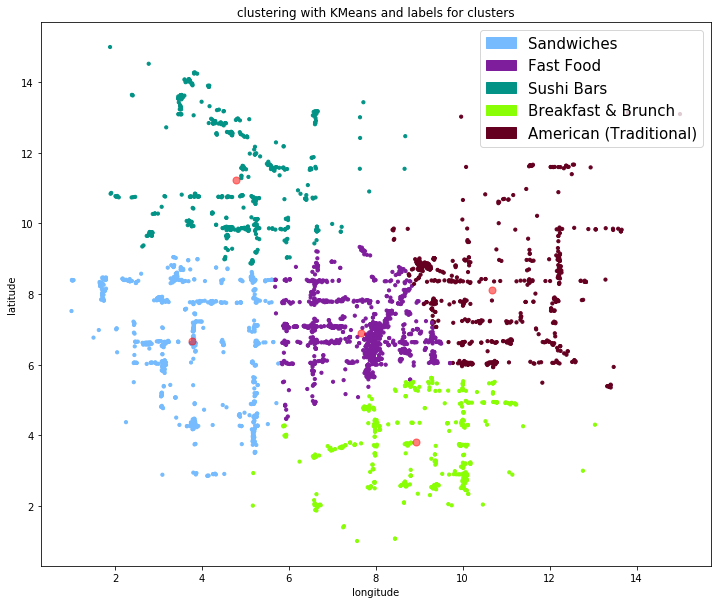

In [33]:
plt.figure(figsize=(12,10))
plt.legend(handles=color_patches, loc = 'upper right', prop={'size': 15})
plt.title('clustering with KMeans and labels for clusters')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=colors, s=10, cmap='viridis')
plt.scatter(centers_cate[:, 0], centers_cate[:, 1], c='red', s=50, alpha=0.5)
#plt.lengend(loc = 'top right', prop={'size': 10})
plt.show()

## <span style="text-decoration:underline;">Problem 2</span>: Outliers and Unsupervised Clustering

**<span style="text-decoration:underline;">Part A</span> (15 points):** Detect the top five outliers for each cluster that you generated in Problem 1. These are the restaurants that are the farthest from the centroids of their clusters.

In [34]:
clusters

,longitude,latitude,Fast Food,Mexican,American (Traditional),Sandwiches,Pizza,Nightlife,Burgers,Bars,Chinese,Food,American (New),Japanese,Breakfast & Brunch,Sushi Bars,Seafood,cluster_label
2597,10.779267,6.061708,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
475,11.210675,9.824195,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
477,11.505448,9.567761,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
478,10.828529,10.006464,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
479,12.327165,11.563410,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
480,12.086437,11.595592,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
481,10.821493,10.573884,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
482,10.929548,10.688104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
483,10.821133,10.617002,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
484,11.047705,10.673008,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [35]:
cluster5 = clusters[clusters["cluster_label"]==4]
cluster4 = clusters[clusters["cluster_label"]==3]
cluster3 = clusters[clusters["cluster_label"]==2]
cluster2 = clusters[clusters["cluster_label"]==1]
cluster1 = clusters[clusters["cluster_label"]==0]

In [36]:
len(cluster1)

670

In [37]:
center5 = centers_cate[4]
center4 = centers_cate[3]
center3 = centers_cate[2]
center2 = centers_cate[1]
center1 = centers_cate[0]

In [38]:
from scipy.spatial import distance
distance.euclidean(clusters.iloc[0][:-1].values.tolist(), centers_cate[0])
#centers[0]
type(distance.euclidean)

function

In [39]:
def eculid_dis_in_cluster(cluster, center):
    eclid_dist_list = list()
    for i in range(len(cluster)):
        #print(i)
        eclid_dist_list.append(distance.euclidean(cluster.iloc[i][:-1].values.tolist(), center))
    return eclid_dist_list

In [40]:
eculid1 = eculid_dis_in_cluster(cluster1, center1)
eculid2 = eculid_dis_in_cluster(cluster2, center2)
eculid3 = eculid_dis_in_cluster(cluster3, center3)
eculid4 = eculid_dis_in_cluster(cluster4, center4)
eculid5 = eculid_dis_in_cluster(cluster5, center5)

In [41]:
print(len(eculid1))
print(len(cluster1))

670
670


In [42]:
# below are top five outliers for each cluster
center1 = cluster1.assign(eculidistance = eculid1)
center1 = center1.sort_values("eculidistance", ascending = False)

center1_top_five_outliers = center1[:6]
center1_top_five_outliers

,longitude,latitude,Fast Food,Mexican,American (Traditional),Sandwiches,Pizza,Nightlife,Burgers,Bars,Chinese,Food,American (New),Japanese,Breakfast & Brunch,Sushi Bars,Seafood,cluster_label,eculidistance
1693,4.322869,2.884271,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.143877
1447,4.123976,2.845902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,4.062515
2518,3.091273,2.878005,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,4.054675
2677,4.515206,2.900320,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.022497
1861,4.155562,2.853987,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.021586
2735,3.860274,2.884897,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.981948


In [43]:
center2 = cluster2.assign(eculidistance = eculid2)
center2 = center2.sort_values("eculidistance", ascending = False)

center2_top_five_outliers = center2[:6]
center2_top_five_outliers

,longitude,latitude,Fast Food,Mexican,American (Traditional),Sandwiches,Pizza,Nightlife,Burgers,Bars,Chinese,Food,American (New),Japanese,Breakfast & Brunch,Sushi Bars,Seafood,cluster_label,eculidistance
1849,5.939721,4.464484,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.242927
2856,5.939721,4.464484,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.131526
912,5.915981,4.860193,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,3.108671
1681,5.976894,4.528543,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.065455
2135,5.939798,4.720473,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.056078
1472,5.915248,4.837846,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,3.009697


In [44]:
center3 = cluster3.assign(eculidistance = eculid3)
center3 = center3.sort_values("eculidistance", ascending = False)

center3_top_five_outliers = center3[:6]
center3_top_five_outliers

,longitude,latitude,Fast Food,Mexican,American (Traditional),Sandwiches,Pizza,Nightlife,Burgers,Bars,Chinese,Food,American (New),Japanese,Breakfast & Brunch,Sushi Bars,Seafood,cluster_label,eculidistance
2166,1.887487,15.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4.845017
2083,8.679359,12.473275,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,4.419241
1574,8.662883,11.548591,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4.120866
1501,7.715523,13.434494,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,4.029002
3087,2.776430,14.525719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,3.979530
2783,2.397590,13.638073,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,3.767501


In [45]:
center4 = cluster4.assign(eculidistance = eculid4)
center4 = center4.sort_values("eculidistance", ascending = False)

center4_top_five_outliers = center4[:6]
center4_top_five_outliers

,longitude,latitude,Fast Food,Mexican,American (Traditional),Sandwiches,Pizza,Nightlife,Burgers,Bars,Chinese,Food,American (New),Japanese,Breakfast & Brunch,Sushi Bars,Seafood,cluster_label,eculidistance
2112,5.172040,2.003062,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,4.377655
1421,13.044023,4.296434,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4.250785
307,12.766334,2.991050,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4.226449
308,5.182213,2.925594,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4.049244
2833,5.880158,4.258836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3,3.383713
2938,6.618461,1.871934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3,3.327810


In [46]:
center5 = cluster5.assign(eculidistance = eculid5)
center5 = center5.sort_values("eculidistance", ascending = False)

center5_top_five_outliers = center5[:6]
center5_top_five_outliers

,longitude,latitude,Fast Food,Mexican,American (Traditional),Sandwiches,Pizza,Nightlife,Burgers,Bars,Chinese,Food,American (New),Japanese,Breakfast & Brunch,Sushi Bars,Seafood,cluster_label,eculidistance
1542,15.000000,13.099489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6.681000
2377,13.804176,13.142177,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5.998088
1769,9.964666,13.025531,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,5.222247
2615,12.943492,11.587738,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4.235700
3021,12.561347,11.666963,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4.229293
2902,13.371539,5.368723,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,4.173403


**<span style="text-decoration:underline;">Part B</span> (35 points):** Cluster the restaurants using the text of the restaurant reviews (rather than the categories) in an unsupervised fashion. Use the document-term matrix approach and tf-idf. Finally, use one cluster comparison metric to compare your results from Problem 1 to your unsupervised clustering results from Problem 2.

In [47]:
review_data = list()
reviews_coll_dict = dict()
with open('yelp_academic_dataset_review.json') as json_data:
    # print(type(json_data))
    # multiple json in a file cause fail in reading\n",
    # read by line, dump to dict, convert dict to df\n",
    # only get the data we need, cut part for experiment.\n",
    i = 0
    for line in json_data:
        if (i < 500000): # due to memory constrain, only read partial data
            single_review_row = json.loads(line)
            if single_review_row.get("business_id") in all_id_top_cat_res: # has tried merge, will have many problem
                # the review data has many repeatative business_id, so merge in df does not work well
                # better filter here
                # also we could just compact reviews to same restaurants (same business_id) during the construction of dataframe
                if single_review_row["business_id"] not in reviews_coll_dict:
                    reviews_coll_dict[single_review_row["business_id"]] = [single_review_row["text"]]
                else:
                    reviews_coll_dict.get(single_review_row["business_id"]).append(single_review_row["text"])
                i+=1
        
len(reviews_coll_dict)

3487

In [48]:
#try option 3:
# dictionary with id as key and reviews as 
def combine_id_review_in_list(reviews_coll_dict, locations, all_reviews_strlist):
    for key in reviews_coll_dict.keys():
        single_review_list = reviews_coll_dict[key]
        comments = "".join(single_review_list)
        all_reviews_strlist.append(comments)
        location = all_restaurants[all_restaurants["business_id"] == key][["longitude", "latitude"]].values.tolist()
        locations += location
    return locations, all_reviews_strlist

In [49]:
locations  = []
all_reviews_strlist = []
locations, all_reviews_strlist = combine_id_review_in_list(reviews_coll_dict, locations, all_reviews_strlist)

In [50]:
len(locations)
# the index of locations and all_reviews_strlist are correspond with each other

3487

In [51]:
print(len(locations))
len(all_reviews_strlist)

# do not print otherwise you will need to sit in front of laptop for at least 10 mins

3487


3487

In [52]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8)
TSVD = TruncatedSVD(n_components=100)

In [53]:
# this function takes the value in dict we defined above and output tf-idf matrix that compressed to a 15-dimension vector by TSVD
# this one meets problem since some res has smaller than 15 reviews, or even no reviews
def review_in_tfidf_TSVD(reviews, vectorizer, TSVD):
    tfidf_reviews = vectorizer.fit_transform(reviews)
    tfidf_reviews_ft_dim = TSVD.fit_transform(tfidf_reviews)
    return tfidf_reviews_ft_dim

In [54]:
sample_locations = locations[:4000] 
# since my laptop is unable to handle codes more than 500, so I just truncate the full data set and only evaluate top 500
# for evaluation about full data set, just commment out this line and next line, but please notice the change in variable name
# Please notice that the variable name I put in the vectorizer is review_test, not all_reviews_strlist

In [55]:
review_test = all_reviews_strlist[:4000]

In [56]:
# unfortuantely my laptop cannot computer when reviews and locations are more than 500, otherwise will result in a memory error
review_test = vectorizer.fit_transform(review_test)
print(review_test.shape)

(3487, 39156)


In [57]:
print(review_test.shape)

(3487, 39156)


In [58]:
review_test_TSVD = TSVD.fit_transform(review_test)
print(type(review_test_TSVD))
#np.argmax(review_test_TSVD, axis = 0)

<class 'numpy.ndarray'>


In [59]:
review_test_TSVD.shape

(3487, 100)

In [60]:
review_test_TSVD[308]

array([ 2.60259756e-01, -4.76652602e-02, -5.31307007e-02, -8.17707097e-02,
       -3.88219843e-02, -1.00219365e-01, -3.04812939e-02,  1.10366710e-01,
        1.90024425e-01,  1.76837560e-01, -8.48640751e-03,  1.97942855e-02,
        9.02132863e-02, -1.66808375e-01,  1.25705183e-01,  6.91180480e-03,
       -1.02387821e-01,  7.66520036e-02,  3.92343795e-02,  1.71609953e-02,
       -2.79212972e-02, -7.86312100e-03,  2.13855347e-03, -1.60593062e-02,
        3.04706221e-01, -8.61804025e-02,  4.73143654e-02,  5.45018477e-03,
       -3.31442566e-02, -3.25382415e-02,  6.35496569e-02, -8.08688143e-02,
       -4.11239702e-02,  8.74868715e-02,  9.94579351e-02, -5.80826387e-02,
        5.63956056e-02, -1.65925144e-03, -4.03504438e-02,  4.93683472e-02,
       -6.07454890e-02, -6.34158014e-02, -3.31592847e-02, -2.59340531e-02,
       -2.06394950e-03,  3.56072113e-02,  3.23178125e-03,  1.42301836e-02,
        1.49144146e-02,  3.20138190e-02,  3.29444488e-02, -4.26338475e-02,
       -4.92330652e-02,  

In [61]:
len(sample_locations)

3487

Before the final step, we need to scale locaitons, otherwise latitude and longitude will be too large s.t. we see no influence from reviews

In [62]:
from sklearn import preprocessing
# I tried to use scale method from class, but that just scale inside an array
# we want to keep the range of two arrays within certain values
# from sklearn lib, use MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (-1, 1), copy = True) # keep original intact
scaled_locations = min_max_scaler.fit_transform(np.array(sample_locations)).tolist()
print(len(scaled_locations))
#scaled_locations

3487


In [63]:
scaled_review_test_TSVD[0]

NameError: name 'scaled_review_test_TSVD' is not defined

In [66]:
scaled_review_test_TSVD_list = review_test_TSVD.tolist()
final_kmeans_data = []
for i in range(len(scaled_review_test_TSVD_list)):
    final_kmeans_data += [scaled_locations[i] + scaled_review_test_TSVD_list[i]]
    #([scaled_location_res_in_top_cat[i][0] + sum(res_in_top_cat[i]),scaled_location_res_in_top_cat[i][1] + sum(res_in_top_cat[i])])
    
print(len(final_kmeans_data))
final_kmeans_data[0]

3487


[-0.11207050105485905,
 0.2719638737578407,
 0.28479972774932316,
 -0.05618721774488278,
 -0.0896986458149197,
 -0.227875333565184,
 -0.19745009113959272,
 -0.19749726881185514,
 0.3192882957395274,
 0.02521454968017172,
 -0.0695672323638168,
 0.00048023352834761126,
 -0.0318223074468037,
 0.10856872551346698,
 0.0222709481914758,
 0.0008541820996959109,
 -0.02582696042540051,
 -0.0015418074813028145,
 0.026515808051723575,
 -0.048000955683153795,
 0.025882648988423435,
 0.05316805836414045,
 0.029068141946528146,
 0.020030012480825282,
 0.012840597382961,
 0.015092798064937069,
 -0.04527767764659769,
 0.0050362304777739324,
 0.011743526298172038,
 0.027037973397905476,
 0.016320907890898028,
 -0.04380293247365801,
 -0.015879718879688327,
 0.035086009513716106,
 -0.025772365583706547,
 -0.031556916549881735,
 -0.01711449108042647,
 -0.027858794201734878,
 0.01656212717224837,
 0.012761085789182088,
 -0.006515350815872341,
 0.0038706408053781243,
 -0.04657145740379149,
 -0.0121415391188

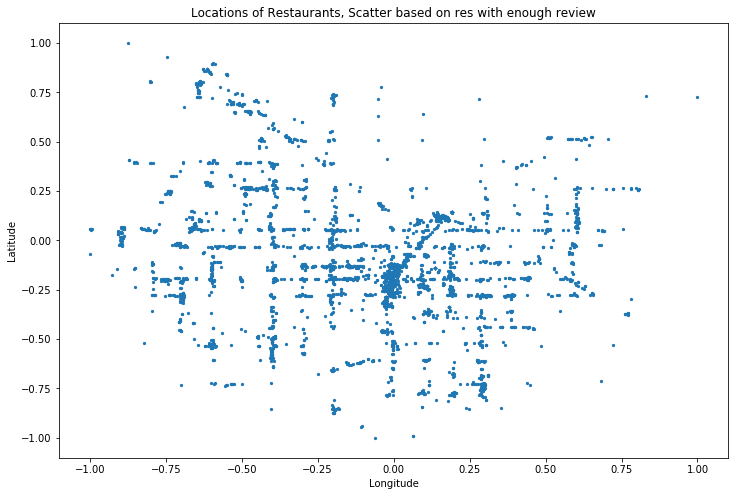

In [67]:
final_kmeans_data_np = np.array(final_kmeans_data)
plt.figure(figsize=(12,8))
_ = plt.scatter(final_kmeans_data_np[:, 0], final_kmeans_data_np[:, 1], s = 5)   #k[:,0]  every element[0] = longitude,etc
plt.title('Locations of Restaurants, Scatter based on res with enough review')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Now we will check the errors based on different clustering numbers by intertia and ss, decide our number of clusters from it

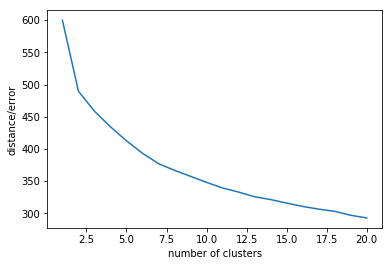

In [68]:
error = np.zeros(21)
for k in range(1, 21):
    kmeans = KMeans(init = "k-means++", n_clusters = k, n_init=100)
    kmeans.fit_predict(final_kmeans_data_np[:1000])
    error[k] = kmeans.inertia_
    
inertia_plot = plt.plot(range(1, len(error)), error[1:])
plt.xlabel("number of clusters")
plt.ylabel("distance/error")
inertia_plot

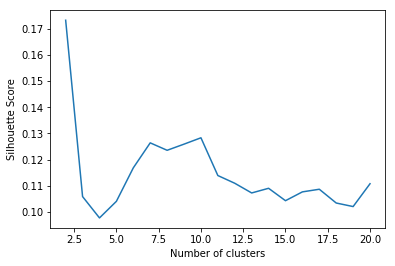

In [69]:
# to evaluate the sc for clusters assignment, we need at least have two clusters
# Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
# I have tested this one with full data, but my laptop has run out of memory for full data
# so I only test for case with small set or samll cluster range
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    
# for the range of cluster to 20, my computer only allows me to do half part of data
sc_evaluate_clusters(final_kmeans_data_np[:2000],20)

In [70]:
# we have decided, from the graph given above, that the best number of clusters is: 
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=100)
y_kmeans = kmeans.fit_predict(final_kmeans_data_np) # we already convert the final_kmeans_data in np array format as final_kmeans_data_np
centers = kmeans.cluster_centers_
#print(centers)
labels_review = kmeans.labels_
error = kmeans.inertia_


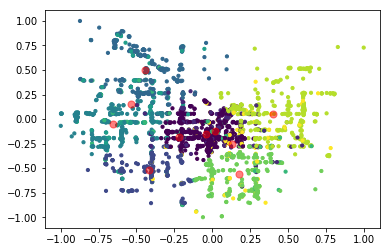

In [71]:
#plt.figure(figsize=(12,10))
plt.scatter(final_kmeans_data_np[:, 0], final_kmeans_data_np[:, 1], c=y_kmeans, s=10, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.5);
plt.show()

In [73]:
# due to memory constrain, I can only test the Adjusted Rand Index in a small data set, which is 500 data here
# when it is larger, my computer will report a memoryerror...
test_labels_review = labels_review[:500]

In [74]:
test_labels_cate = labels_cate[:500]

In [75]:
ri = metrics.adjusted_rand_score(test_labels_review, test_labels_cate)
ri

0.5826216983857806

In [72]:
ri = metrics.adjusted_rand_score(labels_review, labels_cate)
ri

0.6022262770220198

I have getting ARI of 0.9982 here, which seems like a very high score.
Initally my ARI score is 0.005 for all data, but that is due to an error, after debugging process, the score becomes 0.99829... 

By the doubts of having a too high a similarity score of data clustering based on different metric, I have tried to make several changes:

    1: I tried makes the TSVD truncate my tfidf score for reviews to 20 dimensions instead of 15 dimensions
    2: I tried to use MinMaxScaler to adjust my review value so it in the range of 0 to 1, to make better comparison with clustering at problem 1, this does lower my ARI, but only becomes 0.98, which is still very high
    3: I tried to change the max_df and min_df to makes it more/less sensitive, however, my data receives minor to none influence from it
    

In [ ]:
Reasons for this may be:
    When I filter the data for problem 2, I check the data so that it uses the same set of resturants in problem 1
    Restaurants that satisfy many categories could be more popular, and therefore has higher reviews
    Number of cluster is too small
    Problem in truncate the dimension for tf-idf, since when I truncate the tf-idf to 50, I find my data becomes 0.17
    etc.
    

Experiment: